# Benchmarking functions in R3BP

Yuri Shimane, 2021.07.08

In [1]:
using LinearAlgebra
using DifferentialEquations
using BenchmarkTools
using Plots

In [2]:
pyplot()

Plots.PyPlotBackend()

In [13]:
include("../R3BP/src/R3BP.jl")

Main.R3BP

In [7]:
params = R3BP.get_cr3bp_param(399, 301)
mu = params.mu
println("mu: $mu")
lp = R3BP.lagrangePoints(mu)

# initial condition of halo
X0 = [1.176924090973164, 0.0, -0.060210863312217, 0.0, -0.173836346247689, 0.0]
T = 3.385326412831325

# parameters for manifolds
stability = true;
tf = -10.0

mu: 0.012150584269940354


-10.0

In [12]:
outsim = R3BP.get_manifold(mu, X0, T, tf, stability; lstar=params.lstar, callback=nothing, xdir="negative")

EnsembleSolution Solution of length 50 with uType:
ODESolution{Float64,3,Array{Array{Float64,2},1},Nothing,Nothing,Array{Float64,1},Array{Array{Array{Float64,2},1},1},ODEProblem{Array{Float64,2},Tuple{Float64,Float64},true,Float64,ODEFunction{true,typeof(Main.R3BP.rhs_cr3bp_sv!),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}},SciMLBase.StandardODEProblem},Tsit5,OrdinaryDiffEq.InterpolationData{ODEFunction{true,typeof(Main.R3BP.rhs_cr3bp_sv!),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Array{Array{Float64,2},1},Array{Float64,1},Array{Array{Array{Float64,2},1},1},OrdinaryDiffEq.Tsit5Cache{Array{Float64,2},Array{Float64,2},Array{Float64,2},OrdinaryDiffEq.Tsit5ConstantCache{Float64,Float64}}},Dif

In [10]:
@benchmark outsim = R3BP.get_manifold(mu, X0, T, tf, stability; lstar=params.lstar, callback=nothing, xdir="negative")

BenchmarkTools.Trial: 
  memory estimate:  110.51 MiB
  allocs estimate:  846268
  --------------
  minimum time:     105.128 ms (0.00% GC)
  median time:      135.179 ms (17.86% GC)
  mean time:        139.960 ms (21.03% GC)
  maximum time:     283.738 ms (63.64% GC)
  --------------
  samples:          36
  evals/sample:     1

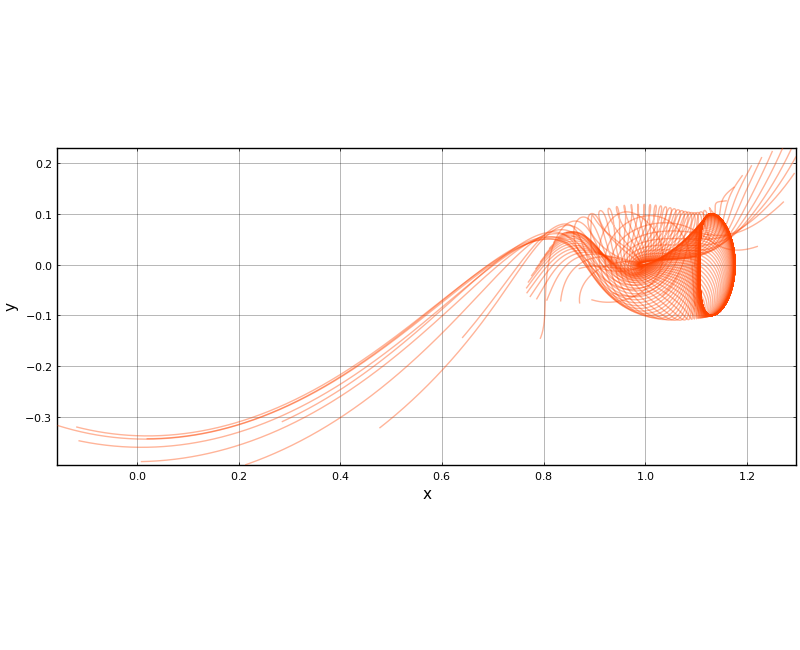

In [14]:
plot(outsim, linealpha=0.4, vars=(1,2), flip=false, aspect_ratio=:equal, size=(800,650), c=:orangered,
     frame_style=:box, gridalpha=0.4, xlabel="x", ylabel="y")

In [15]:
R3BP.get_manifold_ps(outsim)

Main.R3BP.Struct_out_PoincareSection([0.7730932318964241 -0.06364918262115406 … 0.21383113888395774 -0.11842625039993147; 0.7667018794478344 -0.05637417825492667 … 0.22402311599800906 -0.11940650975673765; … ; 0.8061087511595715 -0.0709058853718688 … 0.17066946360240515 -0.11185665070130685; 0.7860249898835897 -0.06837933953824865 … 0.1958520831079553 -0.11626568141161017], [-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0  …  -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0])